Bank Coustomer  Churn Prediction

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Loading dataset

In [14]:
df = pd.read_csv(r'dataset\churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Visualisation

C:\Users\Sahil\AppData\Local\Temp\ipykernel_15428\357288360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index,


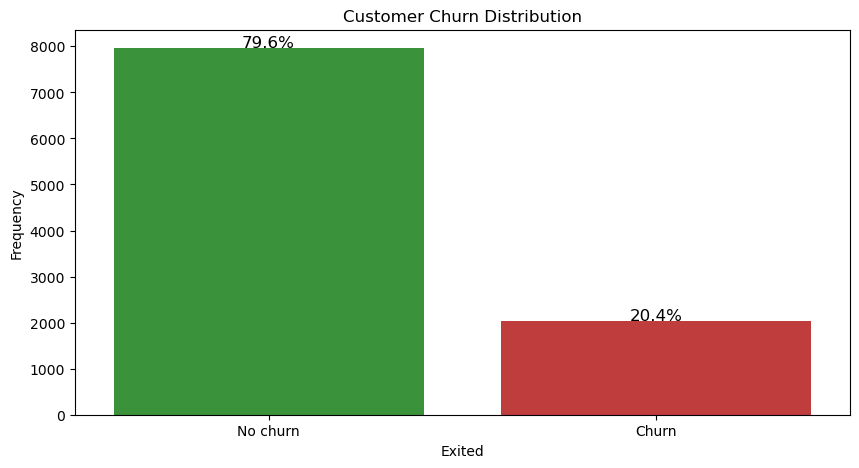

In [18]:
churn_count = df['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.barplot(x=churn_count.index, 
            y=churn_count.values,
            palette= [color_palette[2], color_palette[3]]
            ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                xlabel = 'Exited',
                ylabel = 'Frequency',
                title = 'Customer Churn Distribution'
             )

# Add percentage labels
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

Observation
-  There is a class imbalance. About 79% of the customers didn't exit
-  while about 20% exited.

C:\Users\Sahil\AppData\Local\Temp\ipykernel_15428\3802417499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Gender'].value_counts().index,


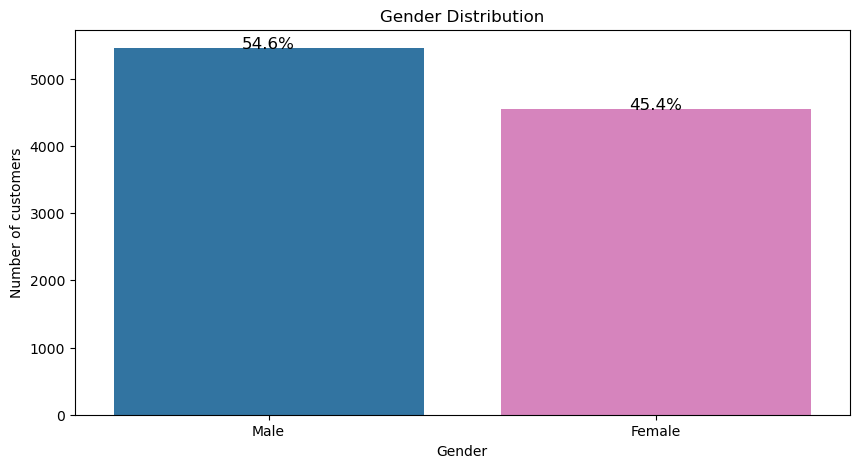

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
color_palette = sns.color_palette()
sns.barplot(x=df['Gender'].value_counts().index, 
            y=df['Gender'].value_counts().values,
            palette=[color_palette[0], color_palette[6]]
            ).set(
                ylabel = 'Number of customers',
                xlabel = 'Gender',
                title = 'Gender Distribution'
            )

# Add percentage labels
gender_counts = df['Gender'].value_counts()
total_count = sum(gender_counts.values)
for i, count in enumerate(gender_counts.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)


Observation
- There slightly more males than females

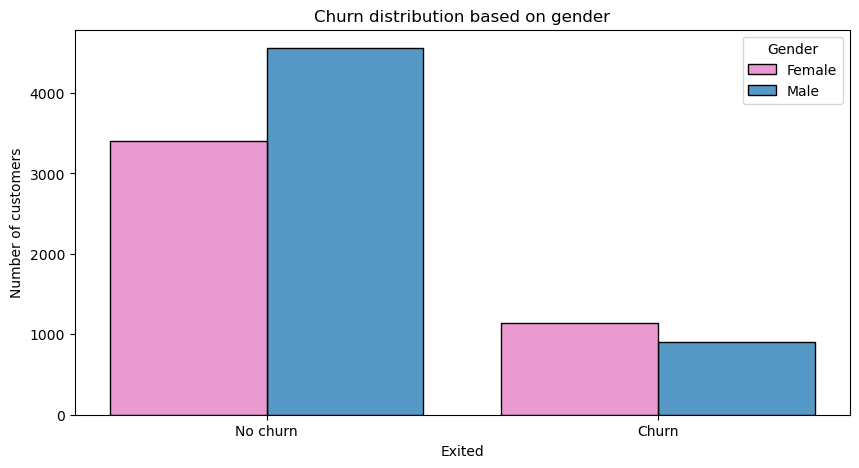

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.histplot(data=df, x='Exited', 
             bins=np.arange(3) - 0.5,
             hue='Gender', 
             multiple='dodge',
             shrink=.8,
             legend= True,
             palette=[color_palette[6], color_palette[0]]
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on gender'
             );

Observation:
- Slightly more males than females didn't exit which is expected since there were more males in the data
- Slightly more females than males exited.

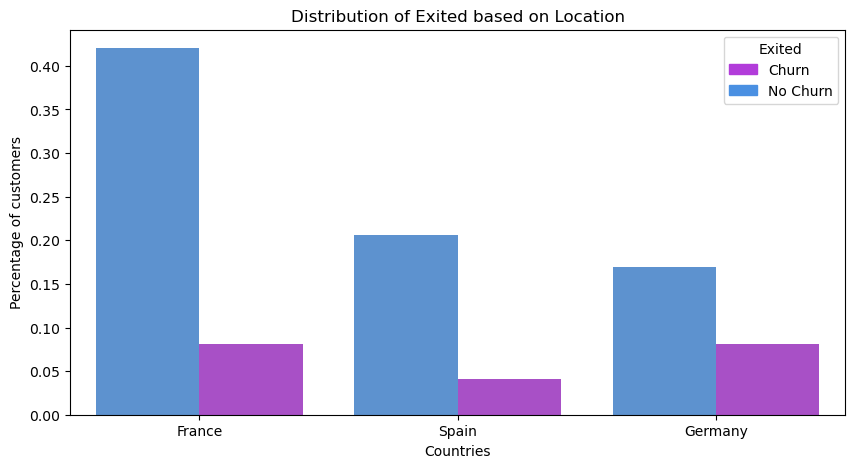

In [21]:
custom_palette = ['#4a90e2', '#b23cda']  
location_exits_df = pd.DataFrame(df[['Geography', 'Exited']].value_counts(normalize=True)).reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=location_exits_df, 
    x='Geography', 
    y='proportion', 
    hue='Exited', 
    palette=custom_palette
).set(
    xlabel='Countries',
    ylabel='Percentage of customers',
    title='Distribution of Exited based on Location'
)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=custom_palette[1]), plt.Rectangle((0, 0), 1, 1, color=custom_palette[0])]
legend_labels = ["Churn", "No Churn"]
ax.legend(legend_handles, legend_labels, title='Exited')
plt.show()


Observation
- The bank operates in 3 locations, France, Spain and Germany
- France seems to be the location with most customers
- France and Germany have almost the same amount of customers who exited.

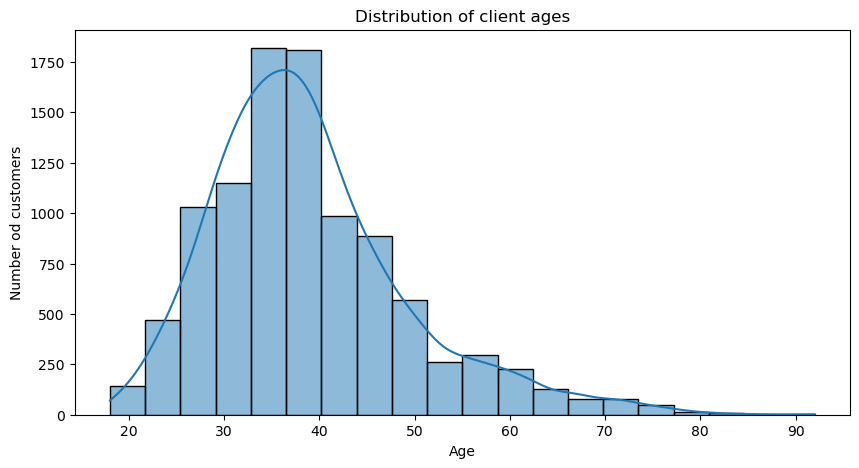

In [22]:
fig , ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df,
             x = 'Age',
             bins = 20,
             ax= ax,
             kde = True,
            ).set(
                xlabel = 'Age',
                ylabel = 'Number od customers',
                title = 'Distribution of client ages' 
    
);

- Majority of the customers are between the ages of 25 to50

In [23]:
#creating age bins
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']

df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,18-30


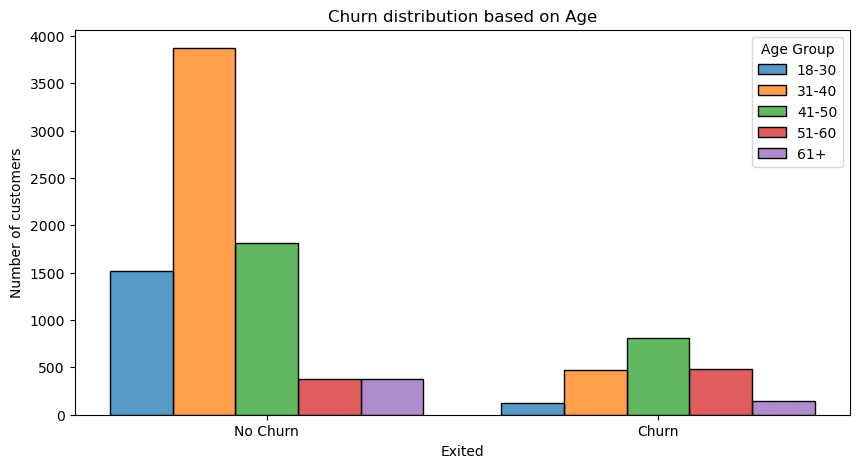

In [28]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df,
             x = 'Exited',
             bins = np.arange(3) - 0.5,
             hue = 'Age Group',
             multiple = 'dodge',
             shrink = .8,
             legend = True
             ).set(
                 xticks = range(2),
                 xticklabels  = ["No Churn", "Churn"],
                 ylabel = 'Number of customers',
                 title = 'Churn distribution based on Age');

- Most accounts are owned by people with less than 50 years. Especially 31-40 years
- Customers of ages 41-50 have the highest churn rate

Data Preparation

In [29]:
df.drop(['RowNumber', 'Surname', 'Age Group'], axis = 1, inplace = True)

In [30]:
#checking duplicates
df['CustomerId'].duplicated(keep = False).sum()

0

In [34]:
#we donot need coustomerid now
df.drop(['CustomerId'], axis = 1, inplace = True)

In [36]:
#for heatmap
count_cols = [i for i in df.columns if df[i].dtype in ['float64', 'int64']]

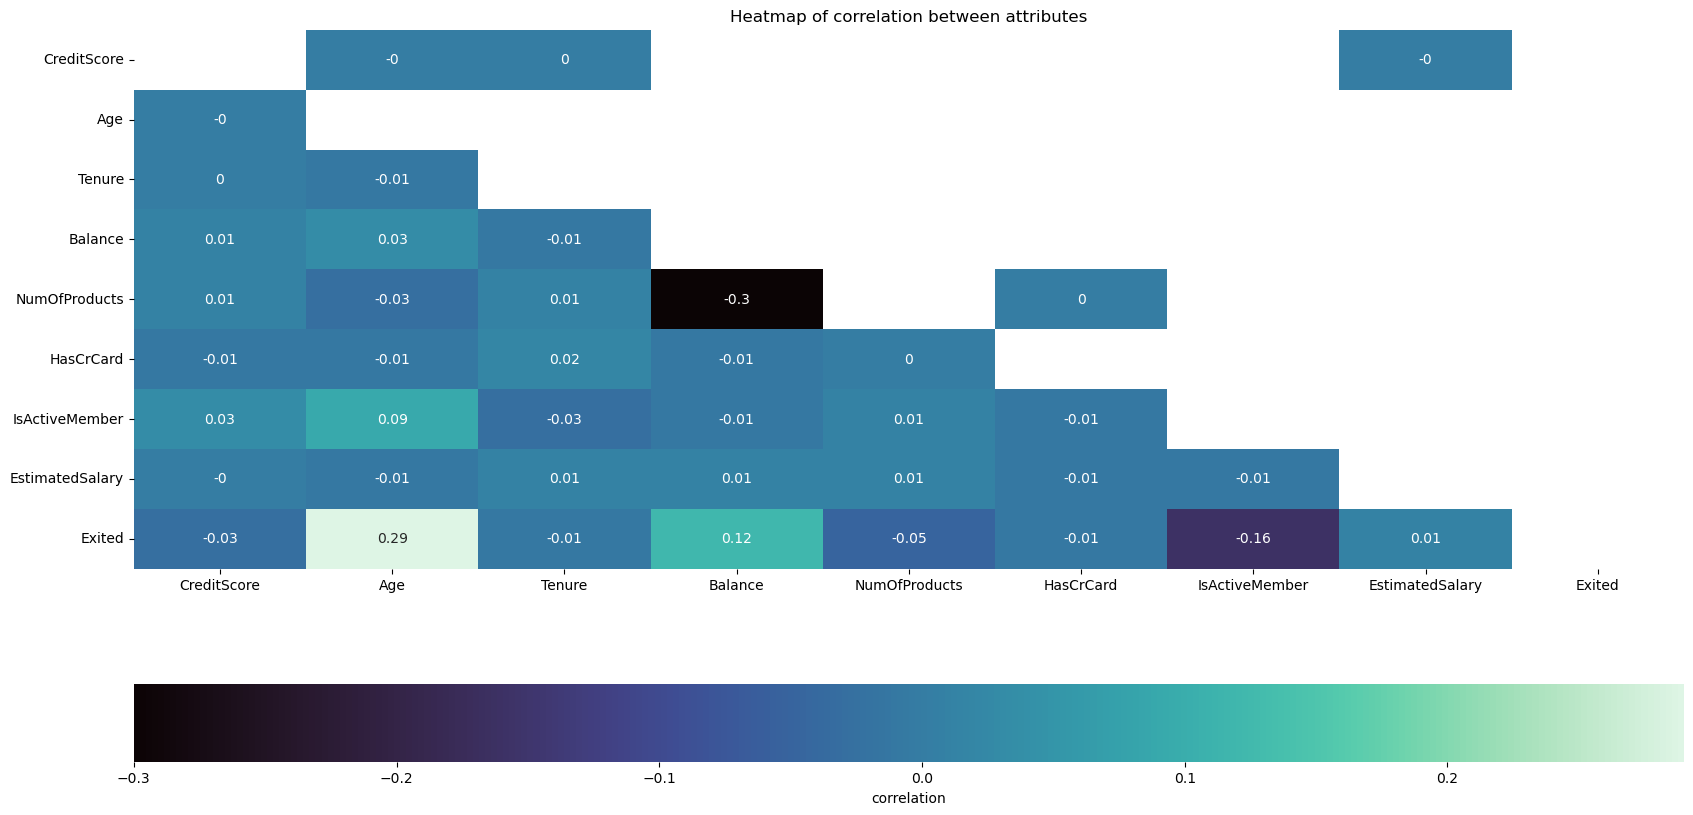

In [39]:
corr = df[count_cols].corr().round(2)
fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(
    corr, 
    mask = np.triu(corr),
    annot = True,
    cmap = "mako",
    ax= ax,
    cbar_kws = {
        "label" : "correlation",
        "orientation" : "horizontal"
    } 
)
ax.set_title("Heatmap of correlation between attributes")
plt.show()

Checking Outliers

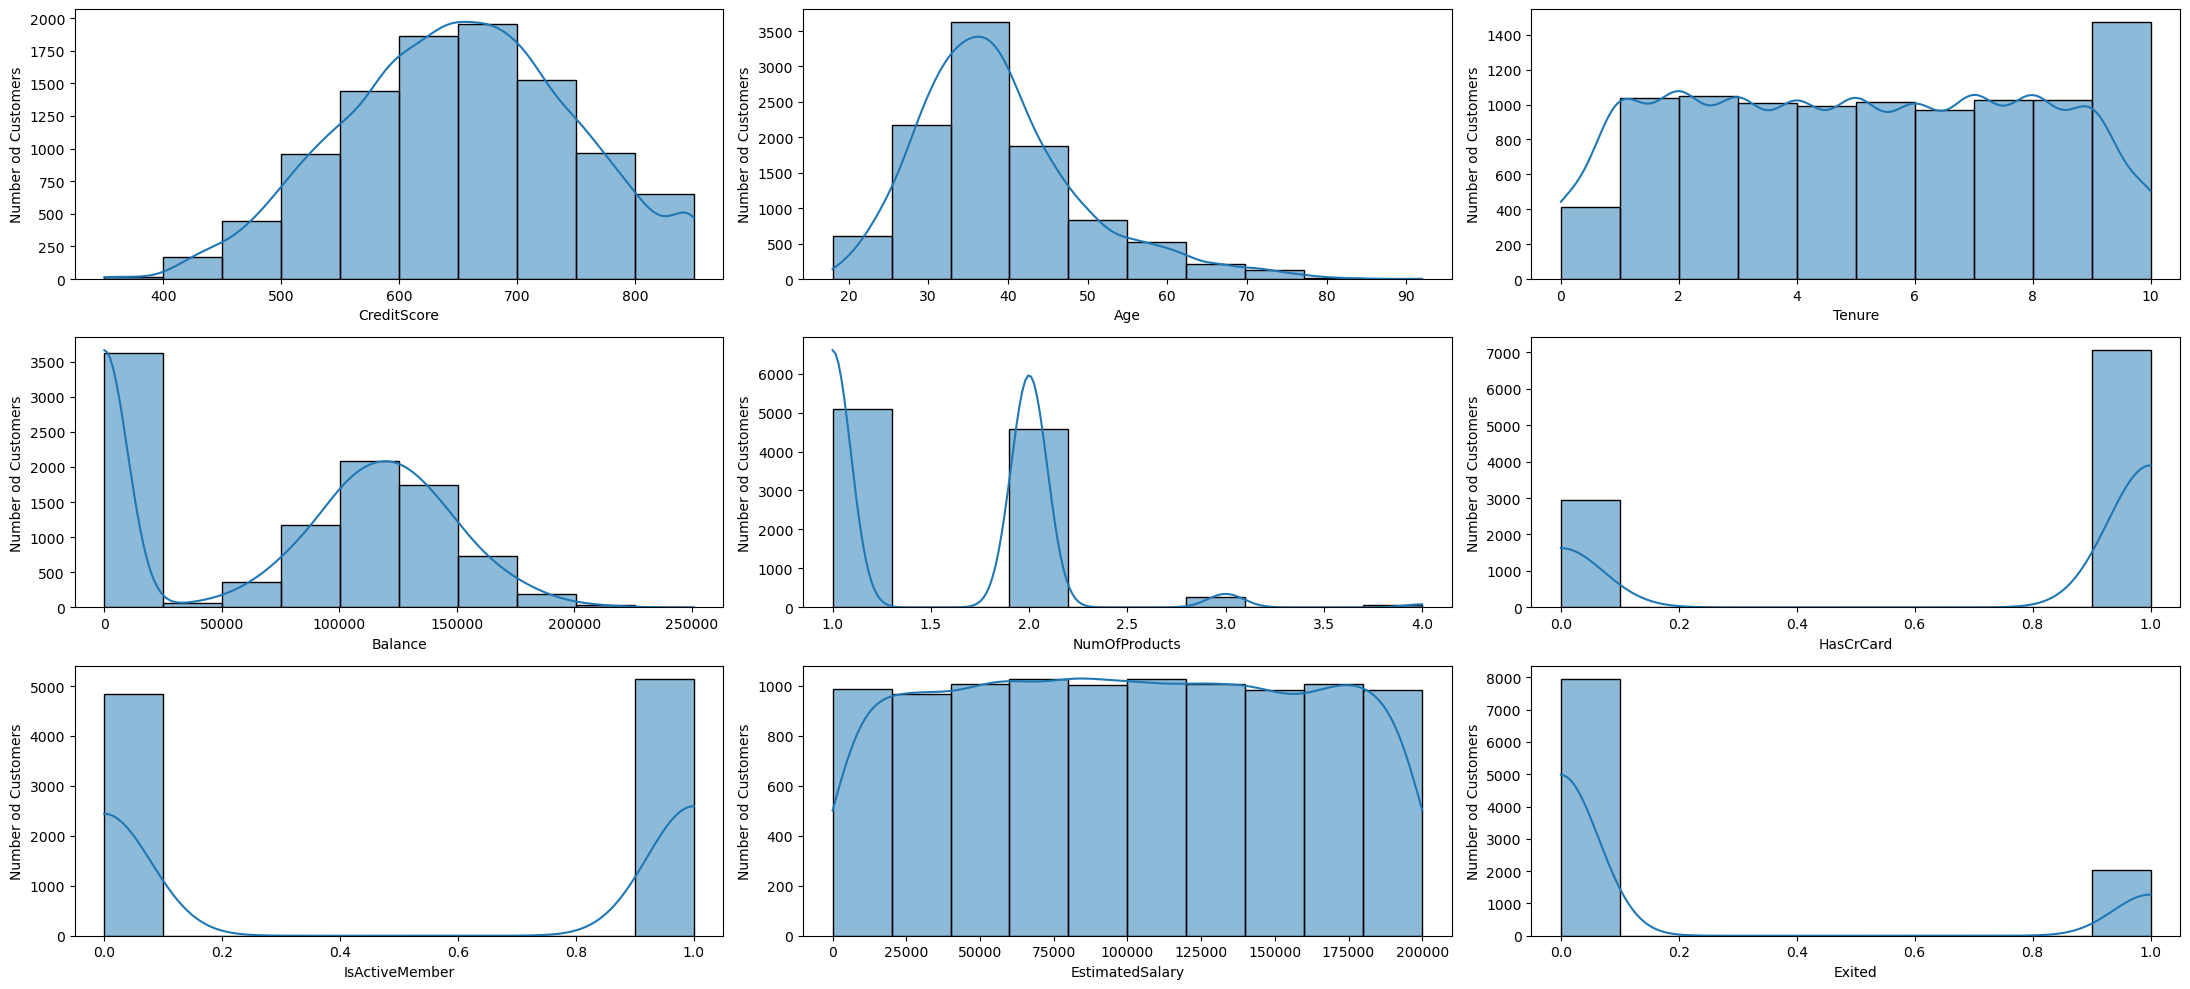

In [40]:
fig, axes  = plt.subplots(ncols = 3, nrows = 3, figsize = (22, 10))
for i, col in enumerate(count_cols):
    ax = axes[i // 3][i % 3]
    sns.histplot(df[col], bins = 10, kde = True, ax = ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Number od Customers")
fig.set_tight_layout(True);

Converting categorical columns to numerical 

In [42]:
[i for i in df.columns if df[i].dtype in ['O']]             # o= object

['Geography', 'Gender']

In [43]:
#for gender we can give 1 =male, 0=female
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_15428\4199696896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


Gender
1    5457
0    4543
Name: count, dtype: int64

In [44]:
df['Geography'] = df['Geography'].replace({'France': 1, 'Spain': 2, 'Germany': 3})
df['Geography'].value_counts()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_15428\2396215816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace({'France': 1, 'Spain': 2, 'Germany': 3})


Geography
1    5014
3    2509
2    2477
Name: count, dtype: int64

In [45]:
#conforming all dataypes
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Train Test split

In [47]:
x = df.drop('Exited', axis = True)
y = df['Exited']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Normalizing the data

In [50]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Modeling

In [53]:
#Models to be tested
models = { 'Model' : ['Baseline Decision Tree', 'Second Decision Tree', 'logistic regression',
                      'KNeighborsClassifier', 'Baseline Random Forest Classifier', 'XGBoost Classifier',
                      'Random Forest Classifier-Grid Search','Final Model-Random Forest Classifier'],
          'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0],
          'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0]}

#Dataframe holding the model names and accuracy score
df_model_results = pd.DataFrame(models, columns=['Model','Train Accuracy Score(%)', 'Test Accuracy Score(%)'])

#Function to fill the dataframe holding model names and accuracy score
def model_results(model_type,y_train, y_train_pred, y_test, y_test_pred):
  index_val = df_model_results[df_model_results['Model']==model_type].index

  df_model_results.loc[index_val, 'Train Accuracy Score(%)'] = round(accuracy_score(y_train, y_train_pred), 2)*100
  df_model_results.loc[index_val, 'Test Accuracy Score(%)'] = round(accuracy_score(y_test, y_test_pred), 2)*100

  return df_model_results

1 - Desicion Tree classifier

In [56]:
baseline_decision_tree = DecisionTreeClassifier(random_state=42)
baseline_decision_tree.fit(x_train, y_train)

y_test_pred = baseline_decision_tree.predict(x_test)
y_train_pred = baseline_decision_tree.predict(x_train)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Decision Tree',y_train, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,0,0
2,logistic regression,0,0
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


-  solving the class imbalance issue observed earlier

In [62]:
ros = RandomOverSampler(random_state = 42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

y_train_resampled.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

Fitting decison tree model again after removing the class imbalance and performing feature selection

In [66]:
second_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
second_decision_tree.fit(x_train_resampled, y_train_resampled)

y_test_pred = second_decision_tree.predict(x_test)
y_train_pred = second_decision_tree.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Second Decision Tree', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.48      0.49      0.48       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('logistic regression', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.81      0.72      0.74      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,0,0
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


KNeighbourClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_resampled, y_train_resampled)

y_test_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('KNeighborsClassifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1607
           1       0.40      0.56      0.47       393

    accuracy                           0.75      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.79      0.75      0.76      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,0,0
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


Random Forest Classifier

In [70]:
baseline_random_forest = RandomForestClassifier(random_state= 123)
baseline_random_forest.fit(x_train_resampled, y_train_resampled)

y_test_pred = baseline_random_forest.predict(x_test)
y_train_pred = baseline_random_forest.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Baseline Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,0,0
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


XG BOOST

In [71]:
xgboost = XGBClassifier()
xgboost.fit(x_train_resampled, y_train_resampled)

y_test_pred = xgboost.predict(x_test)
y_train_pred = xgboost.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('XGBoost Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1607
           1       0.56      0.62      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


Tuning random forest classifier

In [75]:
tuned_random_forest = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [16, 32, 64, None],  
    'min_samples_split': [2, 4, 8, 16], 
    'min_samples_leaf': [1, 2, 4, 8]  
}

random_forest_grid_search = GridSearchCV(tuned_random_forest, param_grid, scoring = 'accuracy', cv =3, n_jobs = 1)
random_forest_grid_search.fit(x_train_resampled, y_train_resampled)

y_test_pred = random_forest_grid_search.predict(x_test)
y_train_pred = random_forest_grid_search.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Random Forest Classifier-Grid Search	', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,0,0


In [76]:
#random forest best parameters
random_forest_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

Final model

In [77]:
final_model = RandomForestClassifier( criterion = 'gini', max_depth = 32, min_samples_leaf = 1, min_samples_split = 2 , n_estimators = 500, random_state = 42)
final_model.fit(x_train_resampled, y_train_resampled)

y_test_pred = final_model.predict(x_test)
y_train_pred = final_model.predict(x_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Final Model-Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


,Model,Train Accuracy Score(%),Test Accuracy Score(%)
0,Baseline Decision Tree,100,78
1,Second Decision Tree,100,80
2,logistic regression,70,72
3,KNeighborsClassifier,94,75
4,Baseline Random Forest Classifier,100,86
5,XGBoost Classifier,96,83
6,Random Forest Classifier-Grid Search,0,0
7,Final Model-Random Forest Classifier,100,86


Visualising the feature importance of the model

In [78]:
def plot_feature_importance(model):
    features = X.columns
    importances = np.sort(model.feature_importances_)
    indicies = np.argsort(importances)
    num_features = 5
    
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.barplot( x= importances[indicies[-num_features:]], y = [features[i] for i in indicies[-num_features:]], ax= ax)
    ax.invert_yaxis()
    ax.set_xlabel('Imporatance')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importance')

Confusion matrix

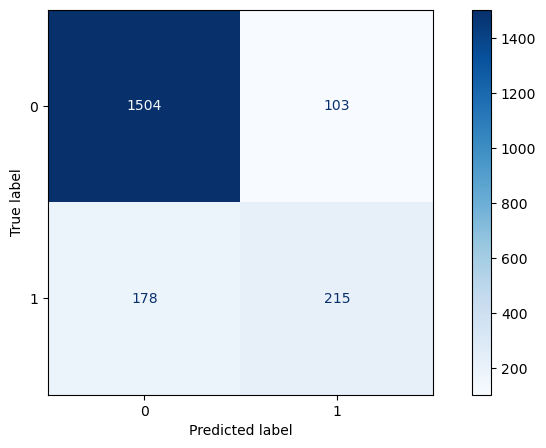

In [81]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = final_model.classes_)
fig, ax = plt.subplots(figsize = (10, 5))
matrix.plot(cmap = plt.cm.Blues, ax =ax);

In [82]:
import joblib

In [83]:
joblib.dump(final_model, 'model.pkl' )

['model.pkl']